In [13]:
from env import get_connection
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
#import my own prepare module
import prepare

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [41]:
df = acquire.get_titanic_data()

In [42]:
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [43]:
def prep_titanic(df):
    '''This function takes in the titanic df specifically and drops the 
    listed columns and creates dummy variables for the selected columns'''
    
    drop_cols = ['Unnamed: 0', 'passenger_id', 'embarked', 'class', 'deck']
    
    df.drop(columns = drop_cols, inplace = True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first = True)

    df = pd.concat([df, dummies], axis = 1)
    
    df.drop(columns = ['sex', 'embark_town'], inplace = True)
    
    df.rename(columns = {'embark_town_Queenstown': 'embark_Q', 'embark_town_Southampton': 'embark_S'}, inplace = True)
    
    return df



In [44]:
df = prep_titanic(df)

In [46]:
df.drop(columns = ['age', 'fare', 'embark_Q', 'embark_S'], inplace = True)
df

,survived,pclass,sibsp,parch,alone,sex_male
0,0,3,1,0,0,1
1,1,1,1,0,0,0
2,1,3,0,0,1,0
3,1,1,1,0,0,0
4,0,3,0,0,1,1
...,...,...,...,...,...,...
886,0,2,0,0,1,1
887,1,1,0,0,1,0
888,0,3,1,2,0,0
889,1,1,0,0,1,1


In [49]:
df = df.astype(int)

In [51]:
def train_val_test(df, target, seed=42):
    '''This function splits the data by taking in a data frame and splits it into 3 sections; train, validate and test
    so you can run your data through an algorithm to test it for acuracy'''
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [52]:
train, val, test = train_val_test(df, 'survived')

train.shape, val.shape, test.shape

((623, 6), (134, 6), (134, 6))

In [54]:
X_train = train.drop(columns = ['survived'])
y_train = train['survived']

X_val = val.drop(columns = ['survived'])
y_val = val['survived']

X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [62]:
seed = 49

rf = RandomForestClassifier(max_depth = 10, random_state = 49,
                           max_samples = 0.5, min_samples_leaf = 1)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.5, random_state=49)

In [64]:
rf.score(X_train, y_train)

0.8378812199036918

In [66]:
y_pred = rf.predict(X_train)

In [67]:
confusion_matrix(y_train, y_pred)

array([[351,  33],
       [ 68, 171]])

In [70]:
val_preds = rf.predict(X_val)

In [72]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        82
           1       0.79      0.71      0.75        52

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.81      0.81       134



In [73]:
print("True positive rate is:", 351/623)
print("True negative rate is:", 171/623)
print("False positive rate is:", 33/623)
print("False Negative rate is:", 68/623)

True positive rate is: 0.5634028892455859
True negative rate is: 0.27447833065810595
False positive rate is: 0.052969502407704656
False Negative rate is: 0.10914927768860354


In [80]:
for i in range(3, 11):
    rf = RandomForestClassifier(max_depth=i, random_state=49,
                               max_samples = 0.5, min_samples_leaf = 2)
    rf.fit(X_train, y_train)
   
    train_acc = rf.score(X_train, y_train)
    
    val_acc = rf.score(X_val, y_val)
    
    print('Max depth of', i, 'Train accuracy: ', train_acc, 'Validation accuracy: ', val_acc)
    print()
    print('----------------------------------------------')
    print()
    

Max depth of 3 Train accuracy:  0.8154093097913323 Validation accuracy:  0.8432835820895522

----------------------------------------------

Max depth of 4 Train accuracy:  0.8282504012841091 Validation accuracy:  0.8208955223880597

----------------------------------------------

Max depth of 5 Train accuracy:  0.826645264847512 Validation accuracy:  0.8134328358208955

----------------------------------------------

Max depth of 6 Train accuracy:  0.8298555377207063 Validation accuracy:  0.8283582089552238

----------------------------------------------

Max depth of 7 Train accuracy:  0.8330658105939005 Validation accuracy:  0.8059701492537313

----------------------------------------------

Max depth of 8 Train accuracy:  0.8314606741573034 Validation accuracy:  0.8283582089552238

----------------------------------------------

Max depth of 9 Train accuracy:  0.8314606741573034 Validation accuracy:  0.8283582089552238

----------------------------------------------

Max depth of 1

The higher the min_sample_leaf value is, the smaller the difference between train and validate accuracy gets and eventually the validate accuracy surpasses the train accuracy

# What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [81]:
for i in range(1, 21):
    trees = RandomForestClassifier(max_depth= i, random_state = 49)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict = True)
    print('Tree with a max depth of', i)
    print(pd.DataFrame(report))

Tree with a max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000
Tree with a max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.810875    0.795000  0.805778    0.802937      0.804785
recall       0.893229    0.665272  0.805778    0.779251      0.805778
f1-score     0.850062    0.724374  0.805778    0.787218      0.801844
support    384.000000  239.000000  0.805778  623.000000    623.000000
Tree with a max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.816667    0.798030  0.810594    0.807348      0.809517
recall       0.893229    0.677824  0.810594    0.785527      0.810594
f1-score 

In [85]:
metrics = []

for i in range(1, 10):
    tree = RandomForestClassifier(max_depth= i, random_state = 49)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    output = {'max_depth': i, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.813433,-0.022101
1,2,0.805778,0.843284,-0.037505
2,3,0.810594,0.843284,-0.032690
3,4,0.829856,0.813433,0.016423
4,5,0.831461,0.813433,0.018028
5,6,0.836276,0.813433,0.022843
6,7,0.837881,0.820896,0.016986
7,8,0.837881,0.820896,0.016986
8,9,0.837881,0.820896,0.016986


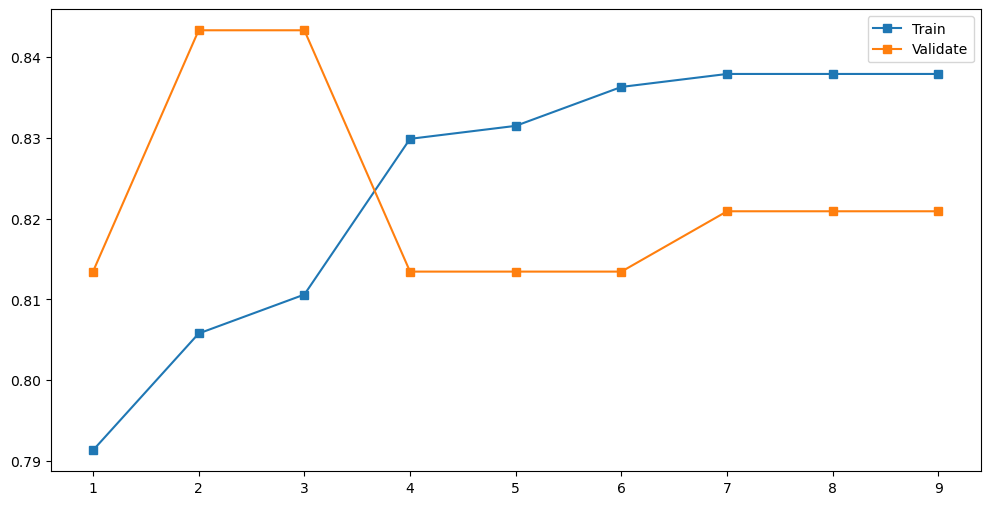

In [94]:
plt.figure(figsize = (12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 's', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 's', label = 'Validate')
plt.legend()
plt.show()